<a href="https://colab.research.google.com/github/vikaschaudhary53/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [93]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [94]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
file_path = '/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project-Linear Regression/SeoulBikeData.csv'

In [96]:
df = pd.read_csv(file_path, encoding="ISO-8859–1")

In [97]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [98]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [99]:
df.shape

(8760, 14)

In [100]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [102]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [103]:
len(df[df.duplicated()])

0

In [104]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [105]:
#Rename the Columns
column_dict = {'Date':'date', 'Rented Bike Count':'rented_bikes', 'Hour':'hour', 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility', 
               'Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radiation', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)': 'snowfall', 'Seasons':'seasons', 'Holiday':'holiday', 'Functioning Day':'functioning_day'}

In [106]:
df.rename(columns= column_dict, inplace=True)

In [107]:
df

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [108]:
len(df['date'].value_counts())*len(df['hour'].value_counts())

8760

####Extracting the 'date', 'month' from complete date

In [109]:
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [110]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

In [111]:
df['week'] = df['day_name'].apply(lambda x: "weekend" if x=='Saturday' or x == 'Sunday' else 'weekday')

In [112]:
df.head()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday


In [113]:
df = df.drop(columns='date')

In [114]:
df

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday


####Try the database with functioning day

In [115]:
df['functioning_day'].value_counts()

Yes    8465
No      295
Name: functioning_day, dtype: int64

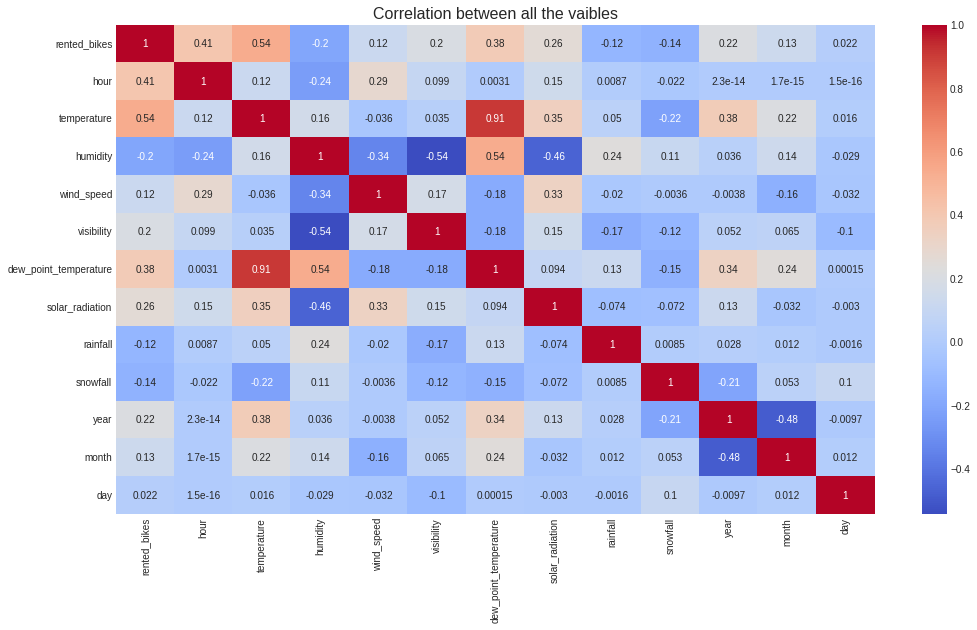

In [116]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

####'temperature' and 'dew_point_temperature' are highly correlated, so dropping 'dew_point_temperature'

In [117]:
df = df.drop(columns='dew_point_temperature')

In [118]:
df

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,Friday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,November,30,Friday,weekday


In [119]:
#Dividing the independent columns into 'numerical' and 'categorical'
numerical_columns = ['hour','temperature','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall']
categorical_columns = ['seasons', 'holiday','functioning_day','month_name','day_name','week']

In [120]:
#Analyzing dependent columns i.e. 'rented_bikes'


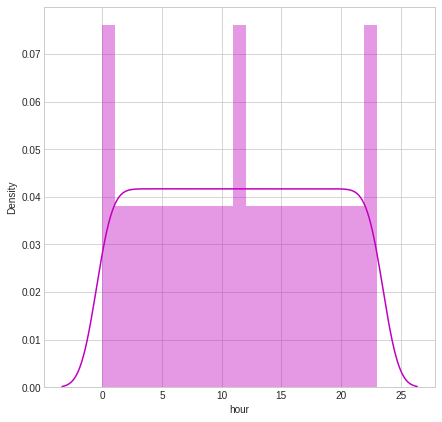

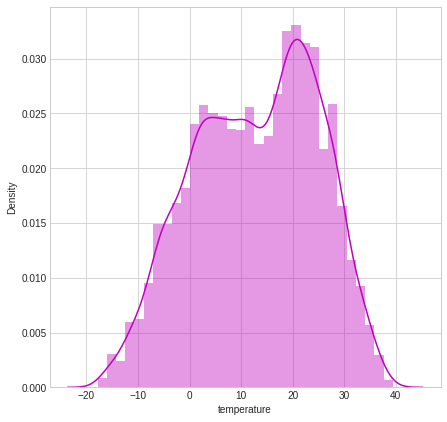

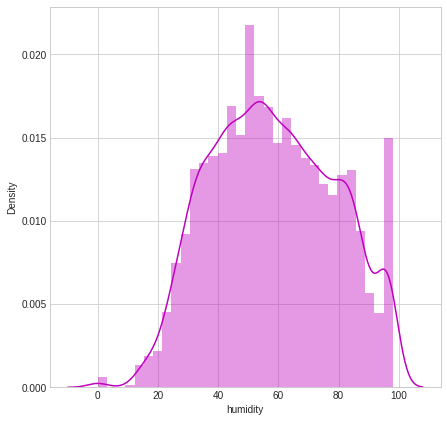

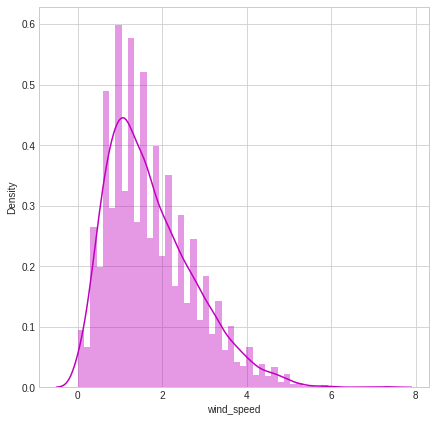

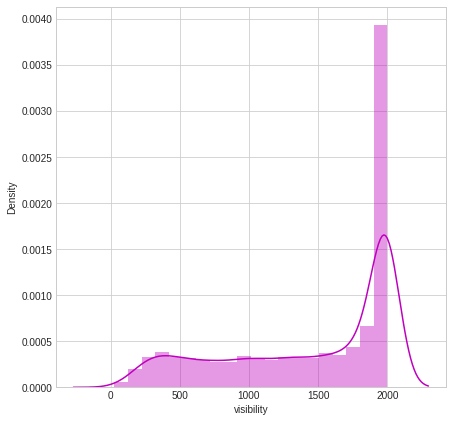

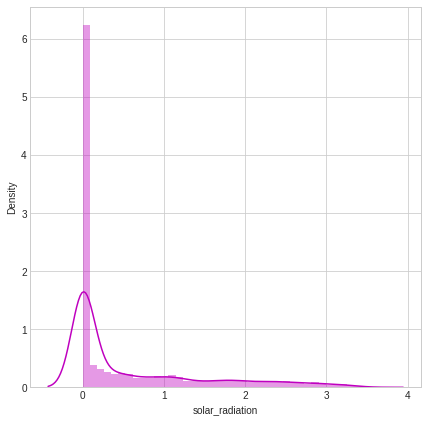

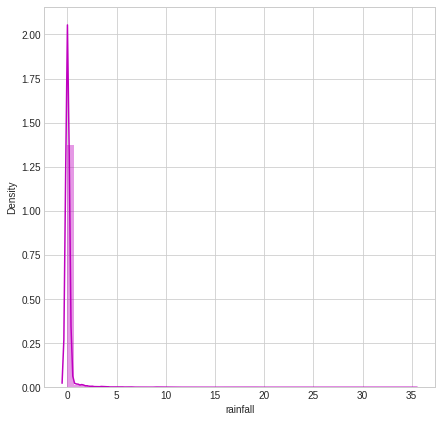

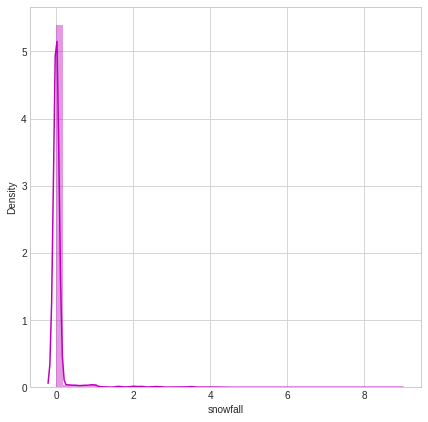

In [121]:
#distplot for numerical features
for val in numerical_columns:
  plt.figure(figsize=(7,7))
  plt.style.use('seaborn-whitegrid')
  sns.distplot(df[val],color="m")
  plt.show()

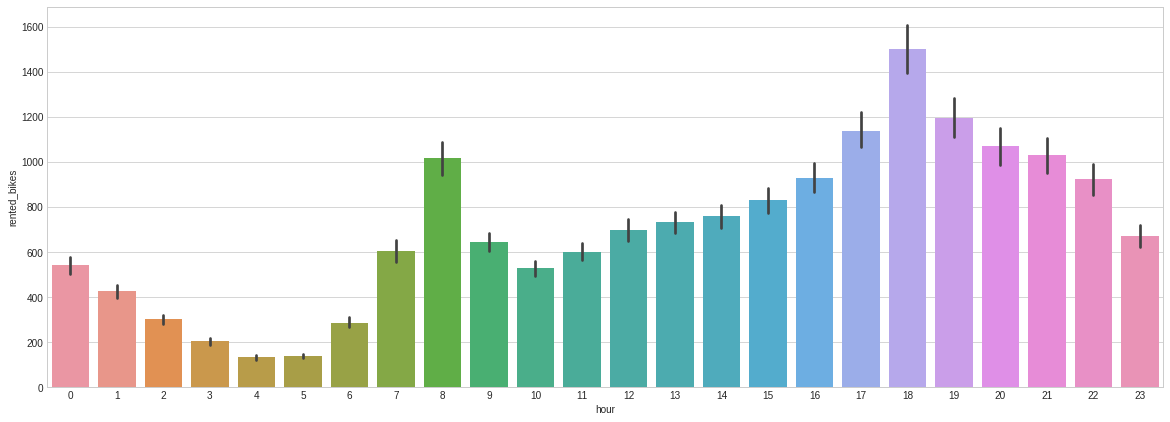

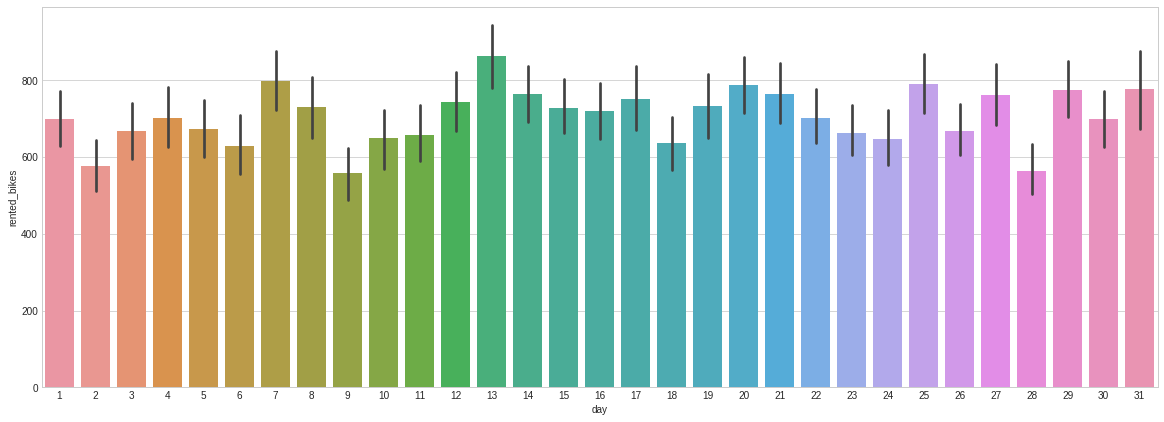

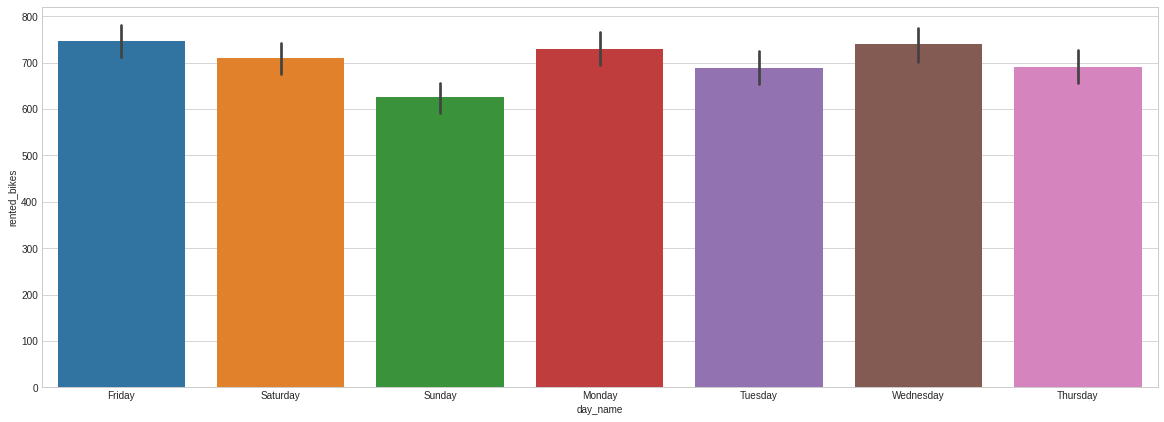

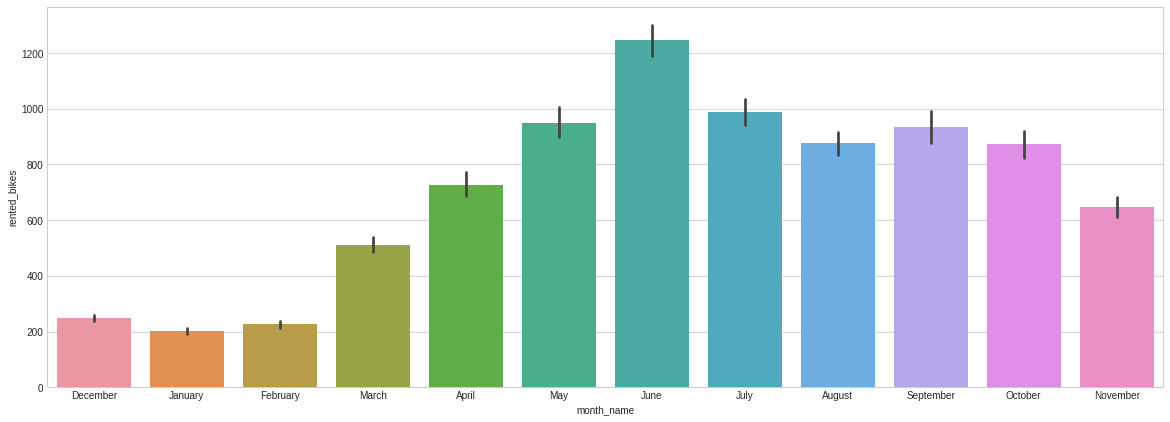

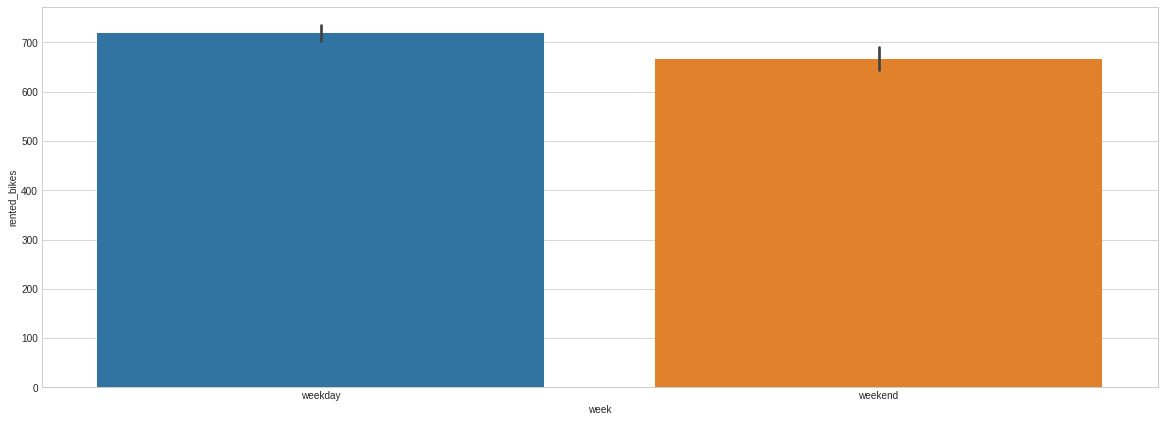

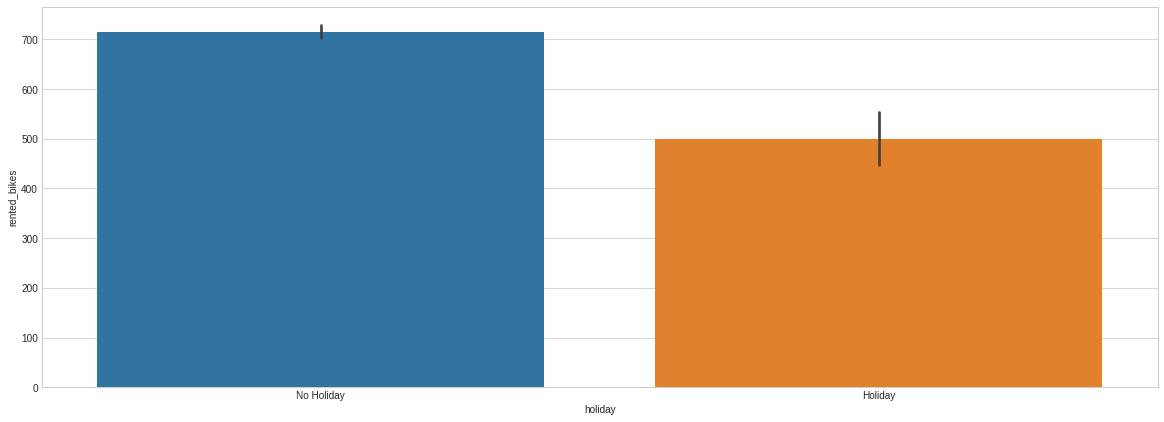

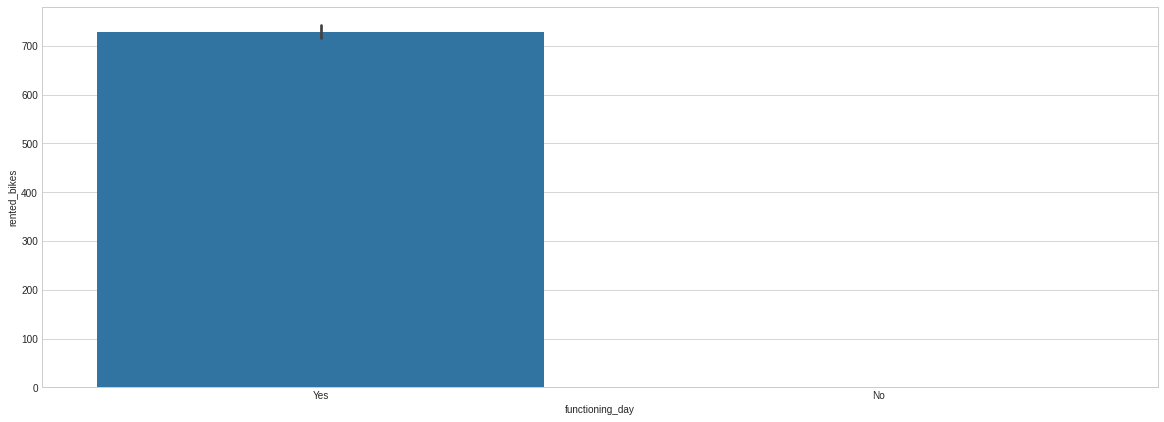

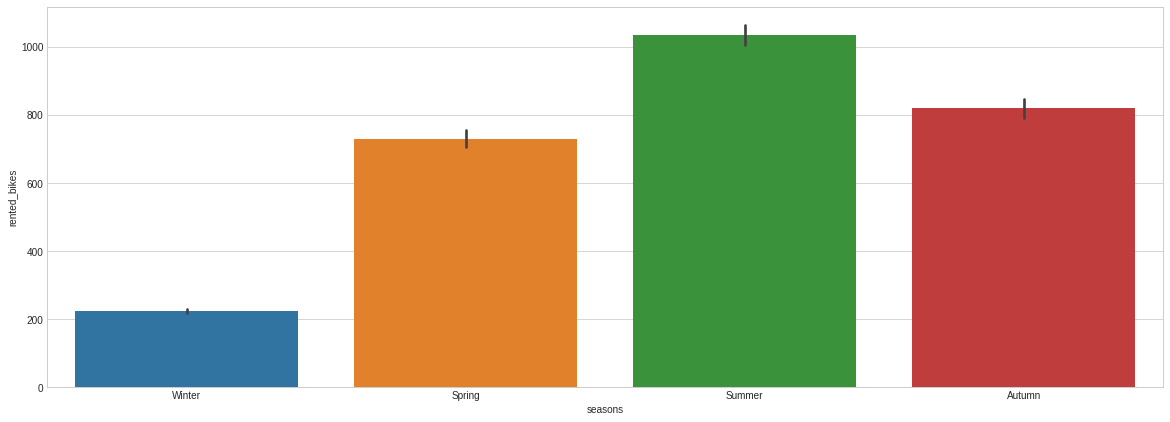

In [122]:
temp_list = ['hour','day', 'day_name', 'month_name', 'week','holiday','functioning_day','seasons']
for col in temp_list:
  plt.figure(figsize=(20,7))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='rented_bikes')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

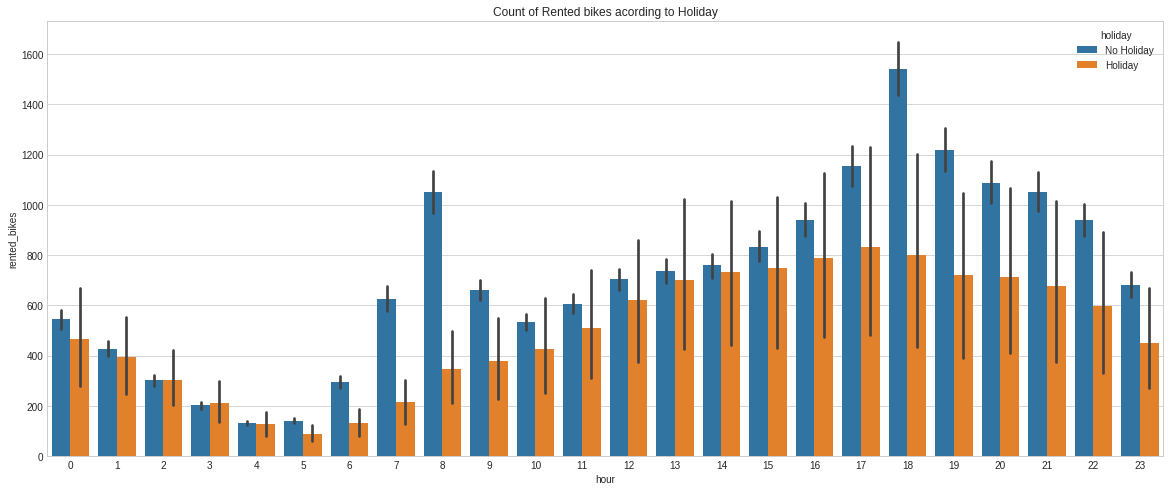

In [123]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='hour',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

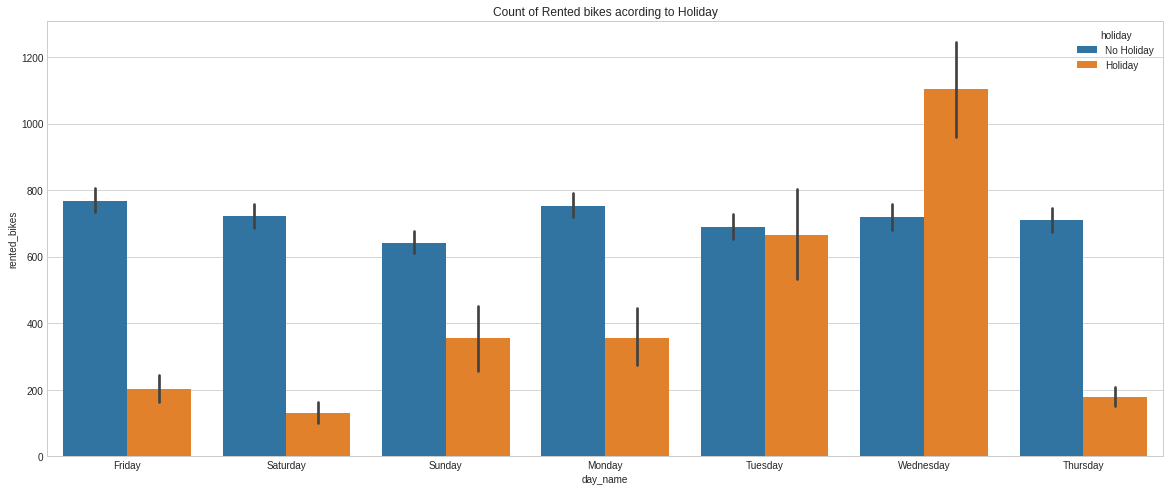

In [124]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='day_name',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

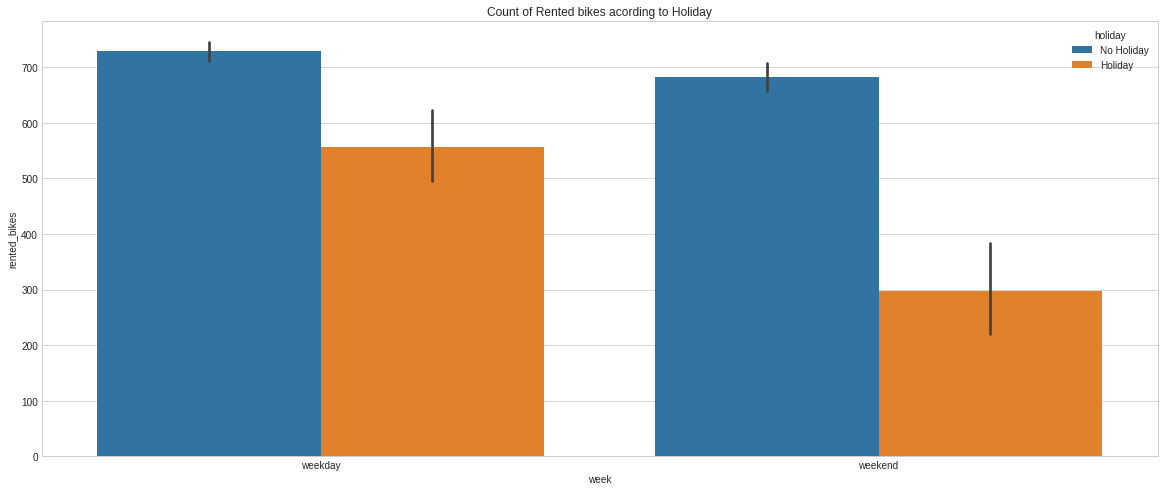

In [125]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='week',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

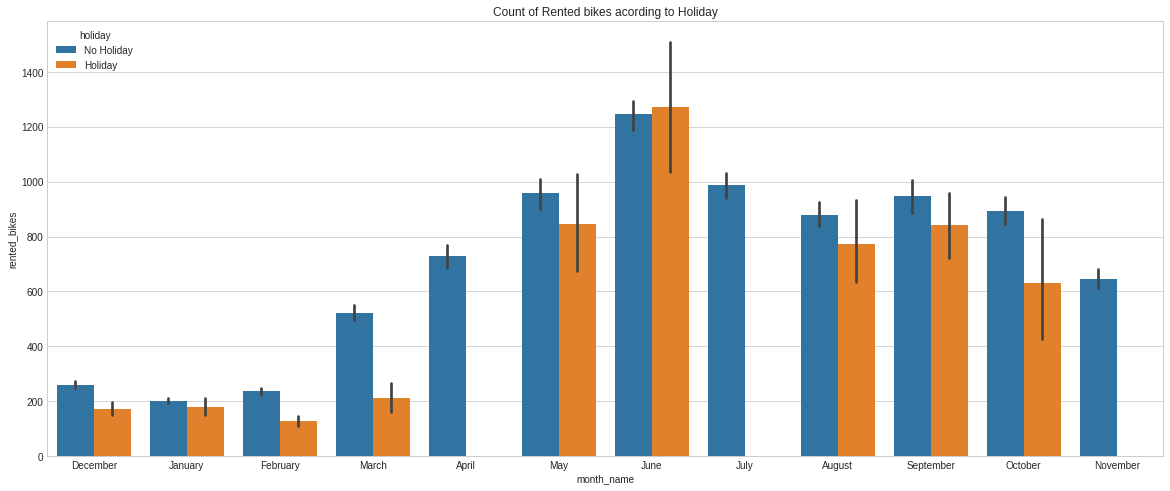

In [126]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='month_name',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

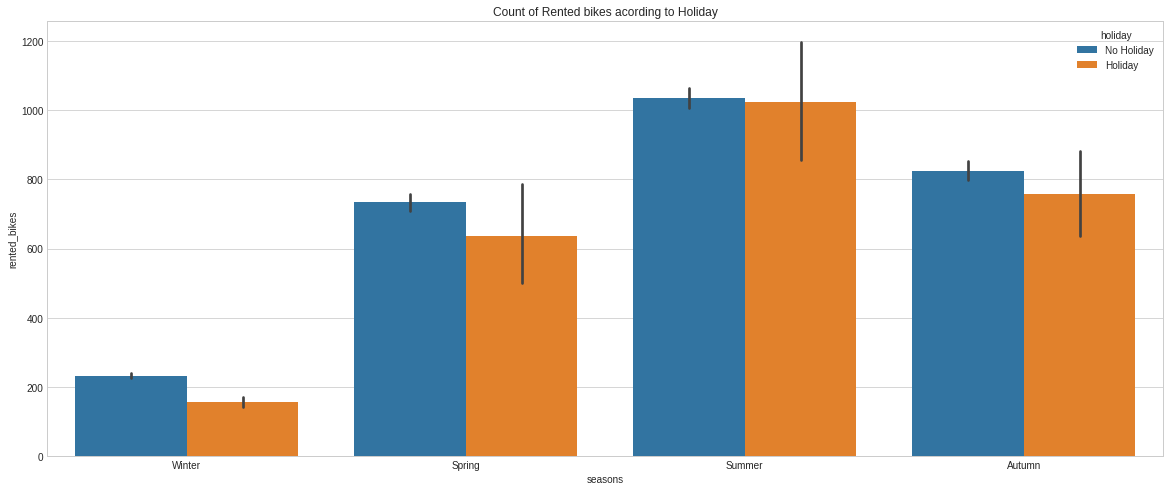

In [127]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='seasons',y='rented_bikes',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')

In [128]:
#Let's look if all sundays are holidays or not
df[(df['day_name']=='Sunday') & (df['holiday']=='No Holiday')]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
48,342,0,4.0,58,1.4,1296,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,3,Sunday,weekend
49,227,1,3.9,69,1.7,485,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,3,Sunday,weekend
50,228,2,3.3,79,1.4,830,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,3,Sunday,weekend
51,117,3,3.4,71,1.6,1011,0.0,0.5,0.0,Winter,No Holiday,Yes,2017,12,December,3,Sunday,weekend
52,76,4,3.5,73,1.0,1060,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,3,Sunday,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,616,19,6.3,73,1.1,524,0.0,0.0,0.4,Autumn,No Holiday,Yes,2018,11,November,25,Sunday,weekend
8636,570,20,5.5,77,0.7,490,0.0,0.0,0.4,Autumn,No Holiday,Yes,2018,11,November,25,Sunday,weekend
8637,546,21,4.7,81,1.0,437,0.0,0.0,0.4,Autumn,No Holiday,Yes,2018,11,November,25,Sunday,weekend
8638,496,22,4.2,82,0.9,405,0.0,0.0,0.4,Autumn,No Holiday,Yes,2018,11,November,25,Sunday,weekend


###Let's look into the pattern of the rented bikes on the basis of 'temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radition', 'rainfall', 'snowfall'

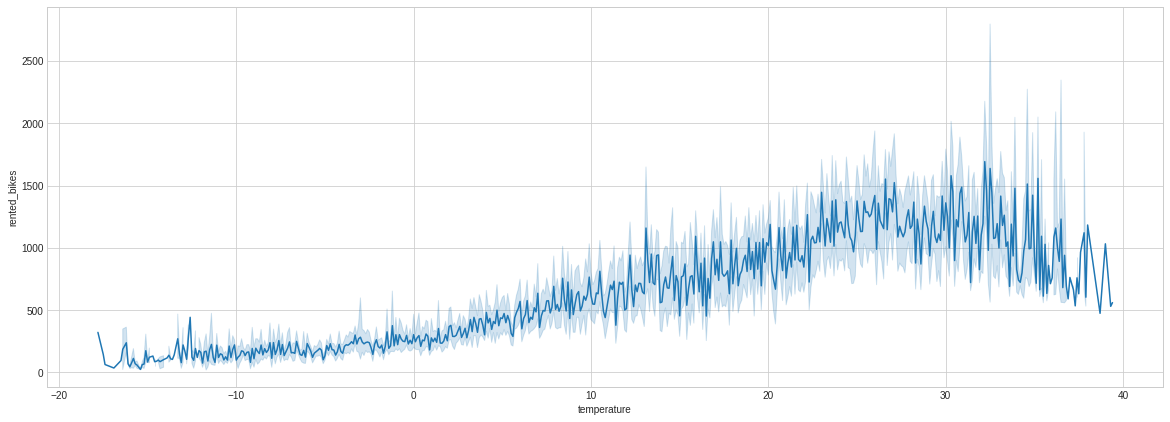

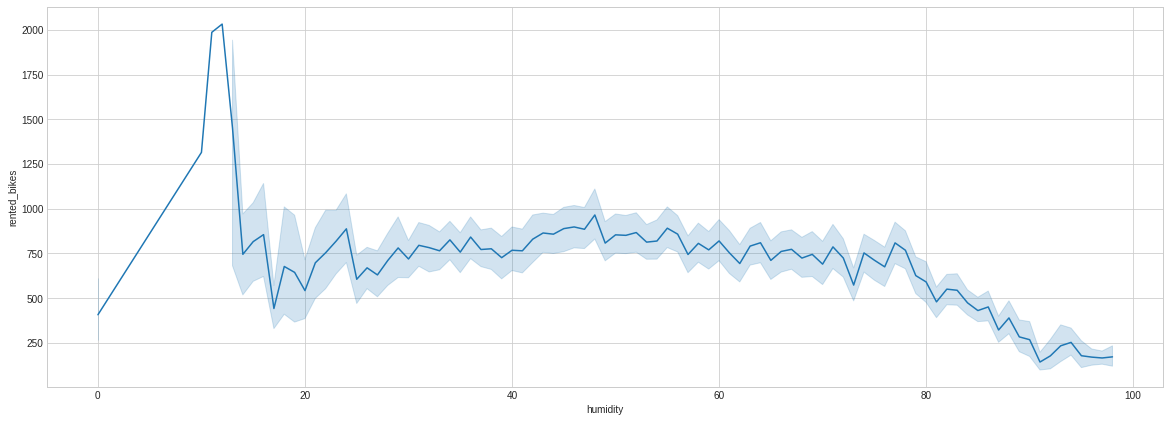

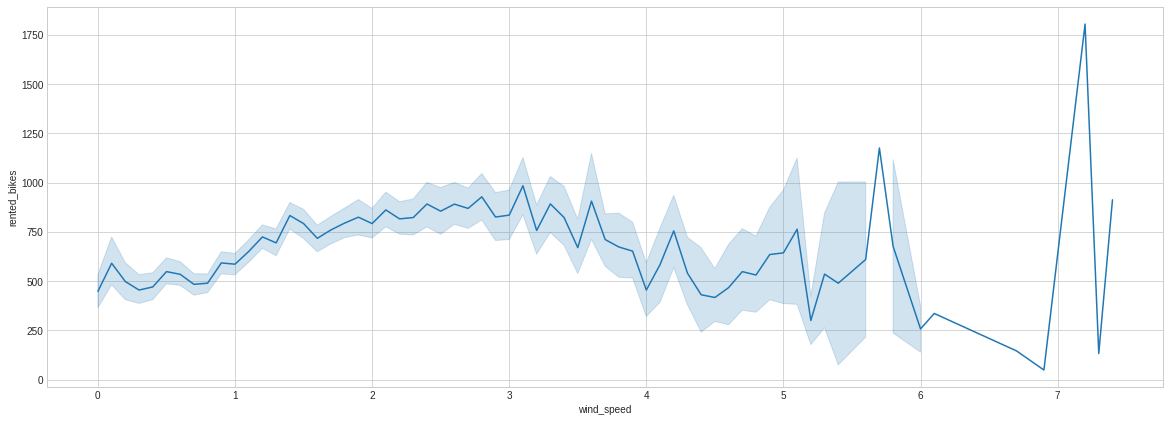

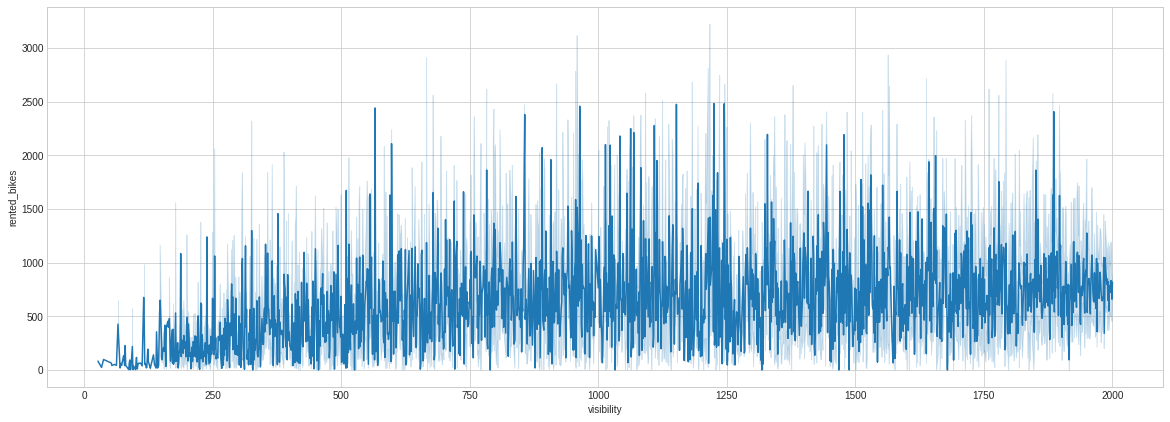

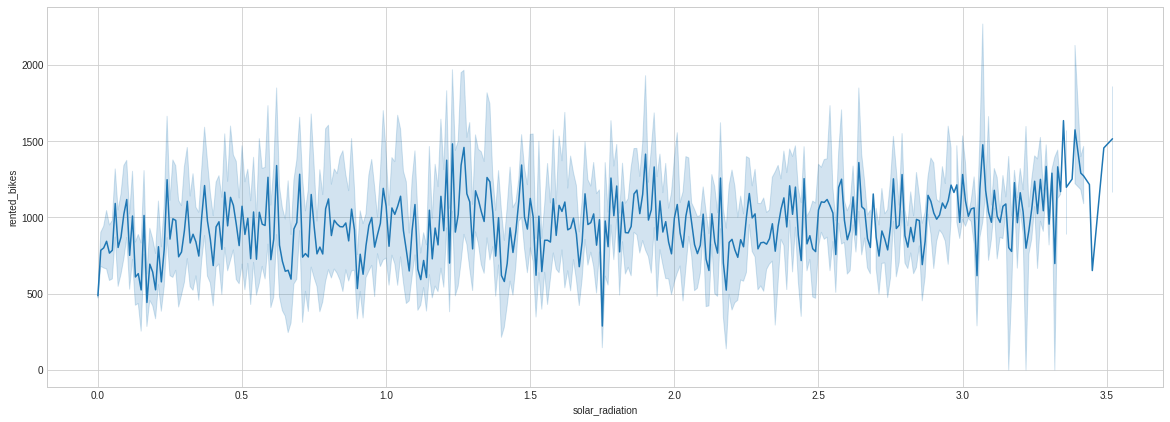

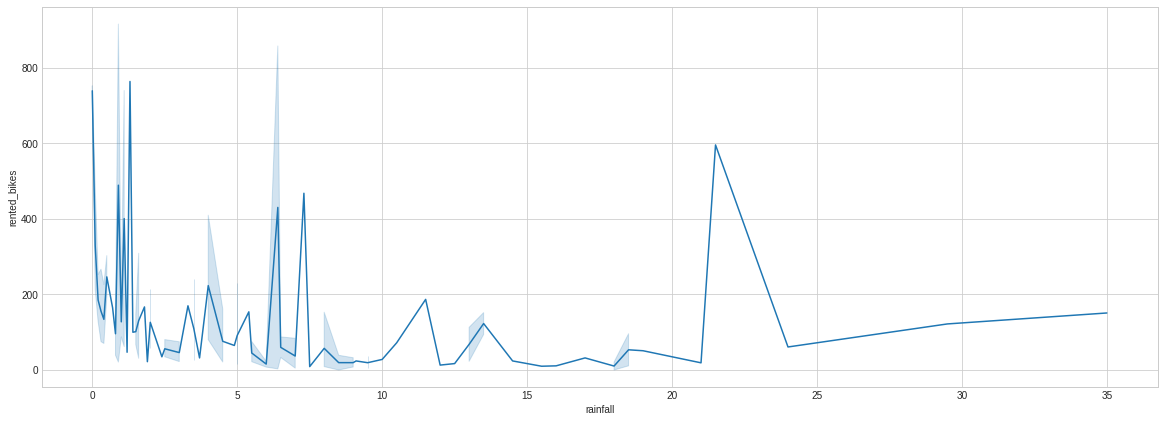

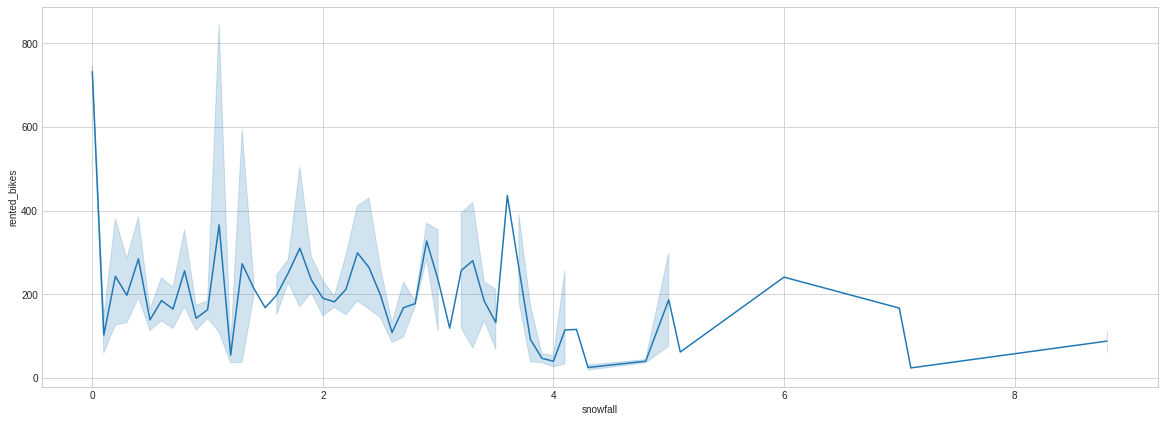

In [130]:
temp_list2 = ['temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']
for col in temp_list2:
  plt.figure(figsize=(20,7))
  plt.style.use('seaborn-whitegrid')
  plots = sns.lineplot(data=df,x=col,y='rented_bikes')

In [131]:
#Looking in functioning day and number of bikes rented to be zero
df[(df['rented_bikes']==0) & (df['functioning_day']=='No')]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week
3144,0,0,14.4,82,4.6,1041,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
3145,0,1,13.6,81,3.6,886,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
3146,0,2,12.7,80,3.9,885,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
3147,0,3,11.6,81,3.1,687,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
3148,0,4,10.2,83,3.5,554,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,April,11,Wednesday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,0,19,11.9,71,2.7,589,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November,9,Friday,weekday
8252,0,20,11.9,72,2.5,526,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November,9,Friday,weekday
8253,0,21,11.4,74,1.9,498,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November,9,Friday,weekday
8254,0,22,11.2,75,1.7,478,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,November,9,Friday,weekday


In [132]:
#If zero bike rented on 'Yes' functioning day
df[(df['rented_bikes']==0) & (df['functioning_day']=='Yes')]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week


In [133]:
#If any bike rented on non-functioning day
df[(df['rented_bikes']!=0) & (df['functioning_day']=='No')]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_name,day,day_name,week


####Non Functioning day means no rental bikes, so we will drop 'functioning_day' column

In [134]:
df = df.drop(columns='functioning_day')

In [135]:
#dropping zero rental rows
df = df[df['rented_bikes']!=0]

In [136]:
df

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday


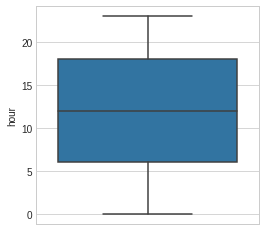

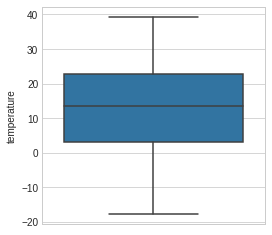

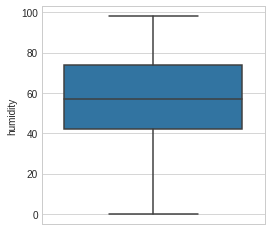

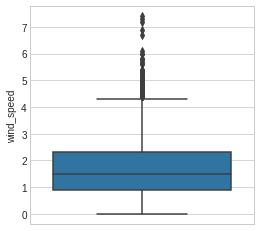

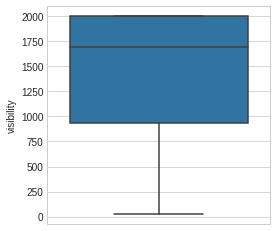

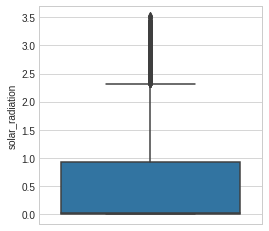

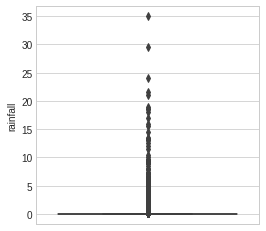

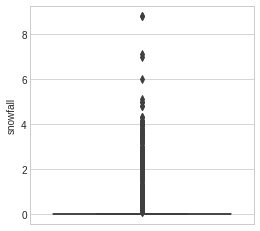

In [137]:
#Looking into the outlier in 'numerical_columns'
for col in numerical_columns:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=df[col])
  #fig.set_title('')
  fig.set_ylabel(col)

  plt.show()

#####'wind_speed', 'solar_radition', 'rainfall' and 'snowfall' have outliers

####Before dealing with the outliers just look into the columns with outliers present in them

In [138]:
df['snowfall'].value_counts()

0.0    8022
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: snowfall, dtype: int64

#### here '0' is no snowfall

In [224]:
df['rainfall'].value_counts().sort_index()

0.0     7949
0.1       44
0.2       20
0.3        9
0.4       16
        ... 
21.0       1
21.5       1
24.0       1
29.5       1
35.0       1
Name: rainfall, Length: 61, dtype: int64

####here 0 means no rainfall

In [141]:
df['solar_radiation'].value_counts()

0.00    4151
0.01     124
0.02      78
0.03      65
0.06      61
        ... 
2.97       1
3.22       1
3.44       1
3.49       1
3.45       1
Name: solar_radiation, Length: 345, dtype: int64

In [236]:
df['wind_speed'].value_counts().sort_index()

0.0     71
0.1     48
0.2     79
0.3    149
0.4    177
      ... 
6.7      1
6.9      1
7.2      1
7.3      1
7.4      1
Name: wind_speed, Length: 65, dtype: int64

In [160]:
df.corr() 

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,year,month,day
rented_bikes,1.000000,0.425256,0.562740,-0.201973,0.125022,0.212323,0.273862,-0.128626,-0.151611,0.232004,0.167186,0.007644
hour,0.425256,1.000000,0.122742,-0.235937,0.287780,0.103869,0.144658,0.014345,-0.022082,0.000315,0.001048,-0.001140
temperature,0.562740,0.122742,1.000000,0.166425,-0.038481,0.028262,0.354844,0.052149,-0.217746,0.377003,0.213947,0.014461
humidity,-0.201973,-0.235937,0.166425,1.000000,-0.337352,-0.548542,-0.457273,0.236917,0.110127,0.035188,0.139090,-0.024615
wind_speed,0.125022,0.287780,-0.038481,-0.337352,1.000000,0.180428,0.326222,-0.024931,-0.003789,-0.003568,-0.154149,-0.033204
visibility,0.212323,0.103869,0.028262,-0.548542,0.180428,1.000000,0.153046,-0.170352,-0.122860,0.051802,0.063474,-0.115933
solar_radiation,0.273862,0.144658,0.354844,-0.457273,0.326222,0.153046,1.000000,-0.074157,-0.073380,0.130141,-0.028675,-0.001724
rainfall,-0.128626,0.014345,0.052149,0.236917,-0.024931,-0.170352,-0.074157,1.000000,0.008604,0.028228,0.010912,0.000455
snowfall,-0.151611,-0.022082,-0.217746,0.110127,-0.003789,-0.122860,-0.073380,0.008604,1.000000,-0.205030,0.058410,0.101834
year,0.232004,0.000315,0.377003,0.035188,-0.003568,0.051802,0.130141,0.028228,-0.205030,1.000000,-0.500050,-0.005630


In [161]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rented_bikes        870.00
hour                 12.00
temperature          19.70
humidity             32.00
wind_speed            1.40
visibility         1065.00
solar_radiation       0.93
rainfall              0.00
snowfall              0.00
year                  0.00
month                 6.00
day                  15.00
dtype: float64


In [162]:
df['snowfall'].skew()

8.29283026085502

In [212]:
#Day with highest 'snowfall'
df[(df['month_name']=='November') & (df['day']==24)]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,year,month,month_name,day,day_name,week
8592,499,0,2.4,32,1.7,2000,0.00,0.0,0.0,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8593,507,1,2.4,30,1.3,2000,0.00,0.0,0.0,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8594,335,2,2.5,29,1.8,2000,0.00,0.0,0.0,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8595,272,3,2.8,28,1.6,2000,0.00,0.0,0.0,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8596,151,4,3.0,26,1.6,2000,0.00,0.0,0.0,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8597,95,5,3.2,27,1.6,2000,0.00,0.0,0.0,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8598,79,6,3.7,25,2.3,2000,0.00,0.0,0.0,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8599,30,7,1.2,87,1.9,77,0.00,0.0,1.3,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8600,33,8,0.4,96,3.1,33,0.00,0.0,4.0,Autumn,No Holiday,2018,11,November,24,Saturday,weekend
8601,24,9,0.3,97,3.0,34,0.00,9.1,7.1,Autumn,No Holiday,2018,11,November,24,Saturday,weekend


In [213]:
df[df['snowfall'] < df['snowfall'].quantile(0.99)]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday


In [220]:
df[df['rainfall'] == df['rainfall'].max()]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,year,month,month_name,day,day_name,week
3997,151,13,21.8,97,2.4,682,0.06,35.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday


In [240]:
df[df['rainfall']>0.0].quantile(0.99)

rented_bikes       1198.400
hour                 23.000
temperature          29.870
humidity             98.000
wind_speed            4.985
visibility         2000.000
solar_radiation       0.890
rainfall             18.925
snowfall              3.925
year               2018.000
month                12.000
day                  30.000
Name: 0.99, dtype: float64

In [241]:
df[df['rainfall'] >=18.9]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,year,month,month_name,day,day_name,week
3997,151,13,21.8,97,2.4,682,0.06,35.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
4012,51,4,19.2,98,2.4,1965,0.00,19.0,0.0,Spring,No Holiday,2018,5,May,17,Thursday,weekday
5034,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,2018,6,June,28,Thursday,weekday
5132,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,2018,7,July,2,Monday,weekday
6501,122,21,22.9,98,2.1,1146,0.00,29.5,0.0,Summer,No Holiday,2018,8,August,28,Tuesday,weekday
6524,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,2018,8,August,29,Wednesday,weekday


In [221]:
#Looking into this specific day 
df[(df['month_name'] == 'May') & (df['day']==16)]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,year,month,month_name,day,day_name,week
3984,662,0,24.4,63,0.8,745,0.00,0.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3985,502,1,24.1,67,0.5,686,0.00,0.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3986,145,2,23.9,69,0.3,531,0.00,0.2,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3987,166,3,22.6,89,0.7,327,0.00,0.8,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3988,124,4,22.3,86,0.5,387,0.00,0.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3989,52,5,22.3,87,0.6,399,0.00,0.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3990,135,6,22.1,94,0.9,269,0.00,2.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3991,367,7,22.0,95,0.7,342,0.00,0.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3992,291,8,22.4,93,1.2,683,0.04,0.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday
3993,97,9,22.8,93,3.1,569,0.06,4.0,0.0,Spring,No Holiday,2018,5,May,16,Wednesday,weekday


In [222]:
df['rainfall'].quantile(0.99)

4.0

In [218]:
#Rainfall
df[df['rainfall'] < df['rainfall'].quantile(0.99)]

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,year,month,month_name,day,day_name,week
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,2017,12,December,1,Friday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,2018,11,November,30,Friday,weekday


####Since the majority of values in 'solar_radition', 'snowfall' and 'rainfall' are zero (0), so we will replace some of the outliar values with the upper limit of the 99 percentile of the non-zero value

###Looking into the dependent feature i.e. 'rented_bikes'

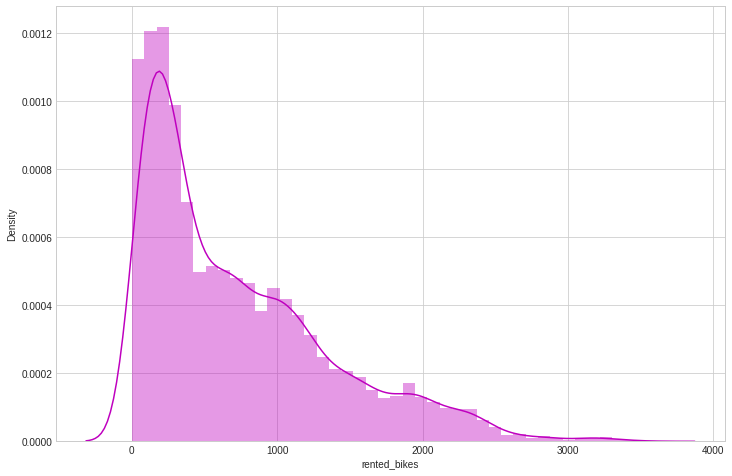

In [177]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
sns.distplot(df['rented_bikes'],color="m")
plt.show()

In [174]:
df['rented_bikes'].skew()

1.1397000550865888

In [181]:
np.sqrt(df['rented_bikes']).skew()

0.34670341483191813

In [182]:
np.log(df['rented_bikes']).skew()

-0.803925612836001

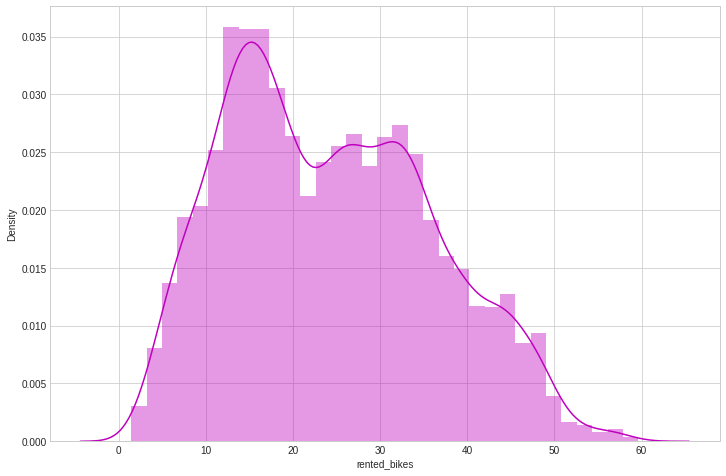

In [178]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
sns.distplot(np.sqrt(df['rented_bikes']),color="m")
plt.show()

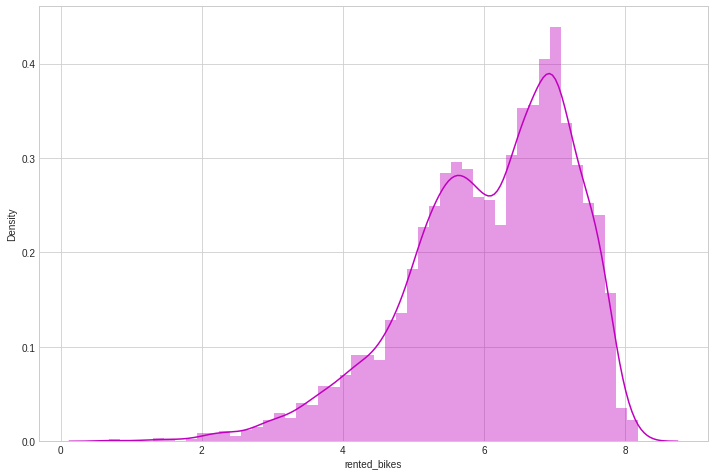

In [179]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
sns.distplot(np.log(df['rented_bikes']),color="m")
plt.show()

####'Square root' transformation working better compare to 'Log' transformation

#### 